In [1]:
import requests # to get the html source code of the page
from bs4 import BeautifulSoup # to parse the html source code
import re # to use regular expressions
from nltk.corpus import stopwords # to remove stopwords
from nltk.stem import PorterStemmer # to stem words to their root form (Example: running -> run)
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

### Download nltk data

In [2]:
# Preprocess the text (remove punctuation and stopwords)
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\angel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\angel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Fetch and Parse HTML

In [3]:
url = "https://en.wikipedia.org/wiki/Independence_Day_(United_States)"
response = requests.get(url)
html_content = response.content
soup = BeautifulSoup(html_content, 'html.parser')

### Extract data

In [4]:
# Example: Extracting all paragraphs
paragraphs = soup.find_all('p')
# Extracting text from each paragraph
paragraph_texts = [paragraph.get_text() for paragraph in paragraphs]

### Text Preprocessing

In [5]:
# Convert to lowercase
lowercase_text = [text.lower() for text in paragraph_texts]

# Remove special characters using regex
cleaned_text = [re.sub(r'[^a-zA-Z0-9\s]', '', text) for text in lowercase_text]

# Tokenization
tokenized_text = [word_tokenize(text) for text in cleaned_text]

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_text = [[word for word in tokens if word not in stop_words] for tokens in tokenized_text]

# Stemming
stemmer = PorterStemmer()
stemmed_text = [[stemmer.stem(word) for word in tokens] for tokens in filtered_text]

In [6]:
# Remove empty tokens
final_text = [[word for word in tokens if word.strip()] for tokens in stemmed_text]
# final_text = [[word for word in tokens if word.strip()] for tokens in filtered_text]

# Convert tokens back to sentences
sentences = [' '.join(tokens) for tokens in final_text]

In [7]:
# Convert sentences back to paragraphs
processed_paragraphs = '\n\n'.join(sentences)

### Save the Propcess

In [8]:
with open('processed_text.txt', 'w', encoding='utf-8') as file:
    file.write(processed_paragraphs)
    
print(processed_paragraphs)



independ day known colloqui fourth juli feder holiday unit state commemor declar independ ratifi second continent congress juli 4 1776 establish unit state america

found father deleg second continent congress declar thirteen coloni longer subject subordin monarch britain king georg iii unit free independ states1 congress vote approv independ pass lee resolut juli 2 adopt declar independ two day later juli 41

independ day commonli associ firework parad barbecu carniv fair picnic concerts2 basebal game famili reunion polit speech ceremoni addit variou public privat event celebr histori govern tradit unit state independ day nation day unit states345

american revolut legal separ thirteen coloni great britain 1776 actual occur juli 2 second continent congress vote approv resolut independ propos june richard henri lee virginia declar unit state independ great britain rule67 vote independ congress turn attent declar independ statement explain decis prepar committe five thoma jefferson pr

In [9]:
# Split the text into sentences keeping the original format
original_sentences = processed_paragraphs.strip().split('.')

# Now 'original_sentences' is an array of text
print(original_sentences)

['independ day known colloqui fourth juli feder holiday unit state commemor declar independ ratifi second continent congress juli 4 1776 establish unit state america\n\nfound father deleg second continent congress declar thirteen coloni longer subject subordin monarch britain king georg iii unit free independ states1 congress vote approv independ pass lee resolut juli 2 adopt declar independ two day later juli 41\n\nindepend day commonli associ firework parad barbecu carniv fair picnic concerts2 basebal game famili reunion polit speech ceremoni addit variou public privat event celebr histori govern tradit unit state independ day nation day unit states345\n\namerican revolut legal separ thirteen coloni great britain 1776 actual occur juli 2 second continent congress vote approv resolut independ propos june richard henri lee virginia declar unit state independ great britain rule67 vote independ congress turn attent declar independ statement explain decis prepar committe five thoma jeffer

In [10]:
len(sentences)

30

In [11]:
def preprocess_text(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalnum()]
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [12]:
#cleaned_sentence = re.sub(r'[^a-zA-Z]', ' ', sentence)

def preprocess_text(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Replace non-alphabetical characters with spaces using regular expression
    cleaned_sentence = re.sub(r'[^a-zA-Z]', ' ', text)
    # Tokenize the cleaned sentence into words
    cleaned_words = word_tokenize(cleaned_sentence)

    # Convert words to lowercase, filter out non-alphabetical characters, and remove stop words
    cleaned_words = [word.lower() for word in cleaned_words if word.isalnum() and word not in stop_words]

    # Join the cleaned words back into a single string
    return ' '.join(cleaned_words)

In [13]:
preprocessed_sentences = []
for sentence in sentences:
    preprocessed_sentence = preprocess_text(sentence)
    preprocessed_sentences.append(preprocessed_sentence)

In [14]:
print(sentences)

['', 'independ day known colloqui fourth juli feder holiday unit state commemor declar independ ratifi second continent congress juli 4 1776 establish unit state america', 'found father deleg second continent congress declar thirteen coloni longer subject subordin monarch britain king georg iii unit free independ states1 congress vote approv independ pass lee resolut juli 2 adopt declar independ two day later juli 41', 'independ day commonli associ firework parad barbecu carniv fair picnic concerts2 basebal game famili reunion polit speech ceremoni addit variou public privat event celebr histori govern tradit unit state independ day nation day unit states345', 'american revolut legal separ thirteen coloni great britain 1776 actual occur juli 2 second continent congress vote approv resolut independ propos june richard henri lee virginia declar unit state independ great britain rule67 vote independ congress turn attent declar independ statement explain decis prepar committe five thoma je

In [15]:
# Calculate TF-IDF scores
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(sentences)
tfidf_scores = tfidf_matrix.sum(axis=1)

In [16]:
# Find the most important sentences based on TF-IDF scores
top_sentence_indices = np.argsort(tfidf_scores, axis=0)[-7:]

In [17]:
top_sentence_indices

matrix([[ 5],
        [ 7],
        [ 4],
        [13],
        [14],
        [12],
        [15]], dtype=int64)

In [18]:
sentences[4]

'american revolut legal separ thirteen coloni great britain 1776 actual occur juli 2 second continent congress vote approv resolut independ propos june richard henri lee virginia declar unit state independ great britain rule67 vote independ congress turn attent declar independ statement explain decis prepar committe five thoma jefferson princip author'

In [19]:
top_sentences = []

for index in range(len(top_sentence_indices)):
    val = sentences[index]
    #print(index, val)
    #top_sentences.append(sentences[index])

    # Join the top sentences to create the summary
    summary = ''.join(val) +  '.'

    print(summary)

.
independ day known colloqui fourth juli feder holiday unit state commemor declar independ ratifi second continent congress juli 4 1776 establish unit state america.
found father deleg second continent congress declar thirteen coloni longer subject subordin monarch britain king georg iii unit free independ states1 congress vote approv independ pass lee resolut juli 2 adopt declar independ two day later juli 41.
independ day commonli associ firework parad barbecu carniv fair picnic concerts2 basebal game famili reunion polit speech ceremoni addit variou public privat event celebr histori govern tradit unit state independ day nation day unit states345.
american revolut legal separ thirteen coloni great britain 1776 actual occur juli 2 second continent congress vote approv resolut independ propos june richard henri lee virginia declar unit state independ great britain rule67 vote independ congress turn attent declar independ statement explain decis prepar committe five thoma jefferson pr

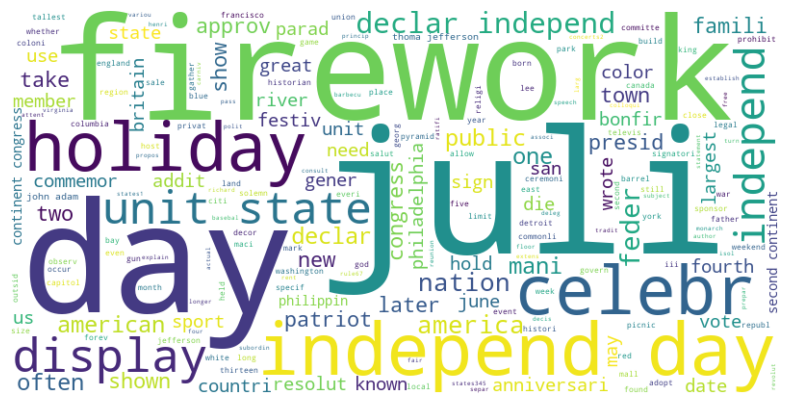

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(processed_paragraphs)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [21]:
from textblob import TextBlob

In [22]:
# Create a TextBlob object with the text
blob = TextBlob(processed_paragraphs)

# Translate the text to Spanish
translated_blob = blob.translate('en', 'es')

# Print the translated text
print(translated_blob)

Día Independ conocido Coloqui Cuarto Unidad de vacaciones de Juli Federal Commemor Declaración Independ Ratifi Segundo Congreso Congreso Juli 4 1776 Establecer la unidad Estado América América

El padre delg Deleg, el segundo continente, el Congreso, declaró trece coloni sujeto más largo Subordina Monarca Gran Bretaña Rey Georg III Unidad gratuita Independ States1 Congreso Congreso Voto aprobado Pase Independ Lee Resolut Juli 2 Adopta Declar Independ dos días después Juli 41

Día Independ Commonli Associ Firework Parad Barbecu CARNIV Fair Picnic Concerts2 BaseBal Juego Famili Reunión Discurso Político Ceremoni Addit Variou Public Privat Evento Celebré de Historia Radio Unidad Estatal Día Independencia National Estados 345

American Revolut Legal Sep trece trece coloni Gran Bretaña 1776 Real ocurrió Juli 2 Segundo continente Congreso Congreso Voto Aprobación Resolución Propuesta independiente Junio ​​Junio ​​Richard Henri Lee Virginia Unidad Estatal Independ Great Britain Rule 67 Voto I